In [1]:
import matplotlib.dates as mdates
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as cmo
import pandas as pd
from tqdm.notebook import tqdm
import my_funcs as my
import matplotlib.colors as colors
from matplotlib.dates import date2num
from matplotlib.animation import FuncAnimation
import time
import sys
sys.path.append('/Volumes/GoogleDrive/My Drive/Projects/code-repos/mdp_functions/')
import plot_params

### Load Slocum dataset

In [5]:
sl = xr.open_dataset('/Users/xduplm/Google Drive/My Drive/Projects/duplessis-2022-turbulent-heatflux/data/slocum/slocum_fully_processed_with_era5_29Apr2022.nc')

era5 = xr.open_dataset('/Users/xduplm/Google Drive/My Drive/Projects/duplessis-2022-turbulent-heatflux/data/era5_allvars.nc')
import matplotlib.dates as mdates

day0=mdates.date2num(np.datetime64('2019-01-01 00:00:00'))

era5['dayofyear']=(('time'), mdates.date2num(era5.time)-day0)
era5 = era5.load()

era5_sl = era5.sel(longitude=0, latitude=-54)
era5_sl = era5_sl.load()

### Load ETOPO 

In [42]:
etopo=xr.open_mfdataset('/Users/xduplm/Google Drive/My Drive/Projects/code-repos/data/ETOPO2v2c_f4.nc')

In [47]:
etopo = etopo.sel(x=slice(-35, 35), y=slice(-75, -25))

In [3]:
max_turb_day=[-11, -4.5, 1, 3.75, 14, 18, 24, 26.3, 30, 36.5, 40.8, 47.4, 60]

In [81]:
d=3

sl_day = sl.where((sl['dayofyear']>d) & (sl['dayofyear']<d+1), drop=True)

Read the relevant ERA5 day

In [82]:
# era5_day = era5.where((era5['dayofyear']>d) & (era5['dayofyear']<d+1), drop=True)

Load the relevant satellite day

In [83]:
days_since=d

In [85]:
# d=366+d
d='00'+str(d+1)

ds = xr.open_dataset('/Users/xduplm/Google Drive/My Drive/Projects/duplessis-2022-turbulent-heatflux/data/modis-satellite-daily/modis_ctt_ctp_'+str(d)+'.nc')

0.03005695343017578


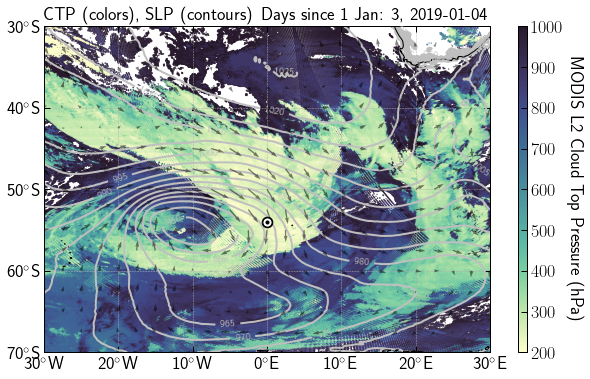

In [99]:
data = ds['Cloud_Top_Pressure']

day=str(ds.time[0].values)[:10]

fig,ax=plt.subplots(figsize=(10,6))

t = time.time()
img = ax.scatter(ds['lon'], ds['lat'], s=0.1, c=data, cmap=cmo.deep, vmin=200, vmax=1000)
elapsed = time.time() - t

print(elapsed)

ax.set_ylim(-70, -30)
ax.set_xlim(-30, 30)

ax.set_title('CTP (colors),  SLP (contours)', loc='left', fontsize=18)
ax.set_title('Days since 1 Jan: '+str(days_since)+', '+day, loc='right', fontsize=18)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.grid(lw=0.5, ls='--')

ax.scatter(0, -54, s=450, marker='.', c='k', zorder=10)
ax.scatter(0, -54, s=150, marker='.', c='k', edgecolor='w', lw=2, zorder=20)

ax.xaxis.set_ticks(np.arange(-30, 40, 10))
ax.xaxis.set_ticklabels(['30$^{\circ}$W', '20$^{\circ}$W', '10$^{\circ}$W', '0$^{\circ}$E', '10$^{\circ}$E', '20$^{\circ}$E', '30$^{\circ}$E'])
ax.yaxis.set_ticks(np.arange(-70, -20, 10))
ax.yaxis.set_ticklabels(['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'])

cb=plt.colorbar(img, aspect=35)
cb.set_label('MODIS L2 Cloud Top Pressure (hPa)', rotation=-90, labelpad=20)

######## PLOT ERA5 DATA 

cs=ax.contour(era5_day.longitude, era5_day.latitude, era5_day.sp/100, 
              levels = np.arange(940, 1030, 5),
              colors='0.75', linewidths=2)

ax.clabel(cs, cs.levels, inline=True, fmt='%1.0f', fontsize=10)

ax.contour(etopo.x, etopo.y, etopo.z, levels=[0], colors='k', linewidths=1)

ax.quiver(era5_day.longitude[::skip], era5_day.latitude[::skip], 
          era5_day.u10[::skip, ::skip], era5_day.v10[::skip, ::skip],
          scale=5e2, zorder=10, alpha=0.5
         )

plt.savefig('/Users/xduplm/Google Drive/My Drive/Projects/duplessis-2022-turbulent-heatflux/figs/modis_ctp_era5_slp_'+str(d)+'.png', dpi=300)

### Plot case study of 4 January 

In [88]:
era5_day = era5.sel(time='2019-01-04T20:00:00')

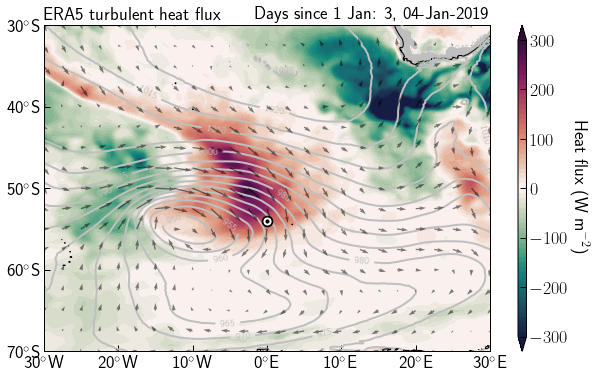

In [100]:
fig,ax=plt.subplots(figsize=(10,6))

######## PLOT ERA5 DATA 

img=cs=ax.contourf(era5_day.longitude, era5_day.latitude, era5_day.slhf+era5_day.sshf, 
                   levels = np.arange(-300, 310, 10),
                   cmap=cmo.curl, extend='both')

cb=plt.colorbar(img, aspect=35)
cb.set_label('Heat flux (W m$^{-2}$)', rotation=-90, labelpad=20)
cb.set_ticks(np.arange(-300, 400, 100))

ax.set_title('', loc='left')
ax.set_title('ERA5 turbulent heat flux', loc='left', fontsize=18)
ax.set_title('Days since 1 Jan: 3, 04-Jan-2019', loc='right', fontsize=18)

cs=ax.contour(era5_day.longitude, era5_day.latitude, era5_day.sp/100, 
              levels = np.arange(940, 1030, 5),
              colors='0.75', linewidths=2)

ax.clabel(cs, cs.levels, inline=True, fmt='%1.0f', fontsize=10)

ax.scatter(0, -54, s=450, marker='.', c='k', zorder=10)
ax.scatter(0, -54, s=150, marker='.', c='k', edgecolor='w', lw=2, zorder=20)

ax.xaxis.set_ticks(np.arange(-30, 40, 10))
ax.xaxis.set_ticklabels(['30$^{\circ}$W', '20$^{\circ}$W', '10$^{\circ}$W', '0$^{\circ}$E', '10$^{\circ}$E', '20$^{\circ}$E', '30$^{\circ}$E'])
ax.yaxis.set_ticks(np.arange(-70, -20, 10))
ax.yaxis.set_ticklabels(['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'])

ax.contour(etopo.x, etopo.y, etopo.z, levels=[0], colors='k', linewidths=1)

ax.set_ylim(-70, -30)
ax.set_xlim(-30, 30)

skip = 10

ax.quiver(era5_day.longitude[::skip], era5_day.latitude[::skip], 
          era5_day.u10[::skip, ::skip], era5_day.v10[::skip, ::skip],
          scale=5e2, zorder=10, alpha=0.5
         )

plt.savefig('/Users/xduplm/Google Drive/My Drive/Projects/duplessis-2022-turbulent-heatflux/figs/map_era5_THF_day_3.png', dpi=300)

In [89]:
era5_day

<xarray.Dataset>
Dimensions:    (latitude: 161, longitude: 241)
Coordinates:
    time       datetime64[ns] 2019-01-04T20:00:00
  * latitude   (latitude) float32 -30.0 -30.25 -30.5 ... -69.5 -69.75 -70.0
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
Data variables:
    t2m        (latitude, longitude) float32 297.5 297.5 297.3 ... 269.5 269.5
    u10        (latitude, longitude) float32 3.516 3.398 2.959 ... -1.272 -1.007
    v10        (latitude, longitude) float32 -7.218 -7.199 ... 0.6684 0.603
    sp         (latitude, longitude) float32 1.015e+05 1.015e+05 ... 9.79e+04
    slhf       (latitude, longitude) float32 -40.46 -37.81 -38.01 ... 1.451 1.29
    sshf       (latitude, longitude) float32 9.139 9.771 9.61 ... 2.848 2.584
    ssr        (latitude, longitude) float32 177.7 182.2 188.1 ... 14.62 14.12
    str        (latitude, longitude) float32 -36.34 -38.75 ... -53.38 -52.86
    wspeed     (latitude, longitude) float32 8.029 7.96 7.631 ... 1.437 1.174
    tau        (latitude, longitude) float64 0.09044 0.08889 ... 0.001934
    dayofyear  float64 3.833
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-21 11:27:25 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...